# Full Text Screening
**Author:** Jack Galbraith-Edge

In [50]:
# Import libraries
from msc_code.scripts.notebook_setup import *

In [51]:
# Import results that were included from Title and Abstract Review.
import_path = os.path.join(PROC_DATA_DIR, "title_abstract_review", "title_abstract_review_include_final.csv") # Define import path.
title_abstract_included = pd.read_csv(import_path) # Import CSV to Pandas Dataframe.

# Take 'id', 'Publication Year', 'Authors', 'Title', 'Publication Title', 'Database' colums to create a new dataframe.
full_text_review_start_df = title_abstract_included[['id', 'Publication Year', 'Authors', 'Title', 'Publication Title', 'Database']]

# Add 'Exclude', 'Reason ID' and 'Comments' columns.
full_text_review_start_df['Exclude'] = None
full_text_review_start_df['Reason ID'] = None
full_text_review_start_df['Comments'] = None

# View first five rows of dataframe
full_text_review_start_df.head()

# Save the dataframe to a CSV file for full text screening.
full_text_review_start_df.to_csv("/".join([PROC_DATA_DIR, "full_text_screen", "full_text_screen_start.csv"]), index=False)

/var/folders/2z/pkyt34z93md62kmcdphb_kf00000gn/T/ipykernel_7302/2888286382.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_text_review_start_df['Exclude'] = None
/var/folders/2z/pkyt34z93md62kmcdphb_kf00000gn/T/ipykernel_7302/2888286382.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_text_review_start_df['Reason ID'] = None
/var/folders/2z/pkyt34z93md62kmcdphb_kf00000gn/T/ipykernel_7302/2888286382.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

In [52]:
# Define exclusion criteria:
exclusion_criteria = {
    1: "Full text not available in English.",
    2: "Studies not focusing on intentional ingestion of foreign object via the oral cavity (mouth).",
    3: "Studies focussing solely on accidental ingestion.",
    4: "Non-Human/Animal studies.",
    5: "Reviews, editorials, commentaries, and opinion pieces without original empirical data.",
    6: "Duplicate publications or studies with overlapping data sets (the most comprehensive or recent study will be included).",
    7: "Studies focusing on ingestion of substances (e.g. poisons, medications) rather than physical foreign objects.",
    8: "Ingestions undertaken in controlled environment as part of voluntary study.",
    9: "Ingestions not explicitly stated to be intentional.",
    10: "Duplicate not previously excluded."
}

In [53]:
# Reimport first author (JGE) screened results as pandas dataframe.
import_path = os.path.join(RAW_DATA_DIR, "full_text_screen", "full_text_screen_end_jge.csv")
jge_screened_df = pd.read_csv(import_path)

jge_excluded = jge_screened_df[jge_screened_df['Exclude'] == True]
jge_excluded_count = len(jge_excluded)
jge_excluded_reasoning = jge_excluded['Reason ID'].value_counts().rename('Count').reset_index()

print(jge_excluded_reasoning)


   Reason ID  Count
0        1.0     15
1        9.0      5
2        5.0      4
3        2.0      3
4       10.0      1


In [54]:
jge_excluded_reasoning['Reason'] = jge_excluded_reasoning['Reason ID'].map(exclusion_criteria)

print(f"JGE excluded {jge_excluded_count} results during full text screening.")
jge_excluded_reasoning

JGE excluded 28 results during full text screening.


,Reason ID,Count,Reason
0,1.0,15,Full text not available in English.
1,9.0,5,Ingestions not explicitly stated to be intenti...
2,5.0,4,"Reviews, editorials, commentaries, and opinion..."
3,2.0,3,Studies not focusing on intentional ingestion ...
4,10.0,1,Duplicate not previously excluded.


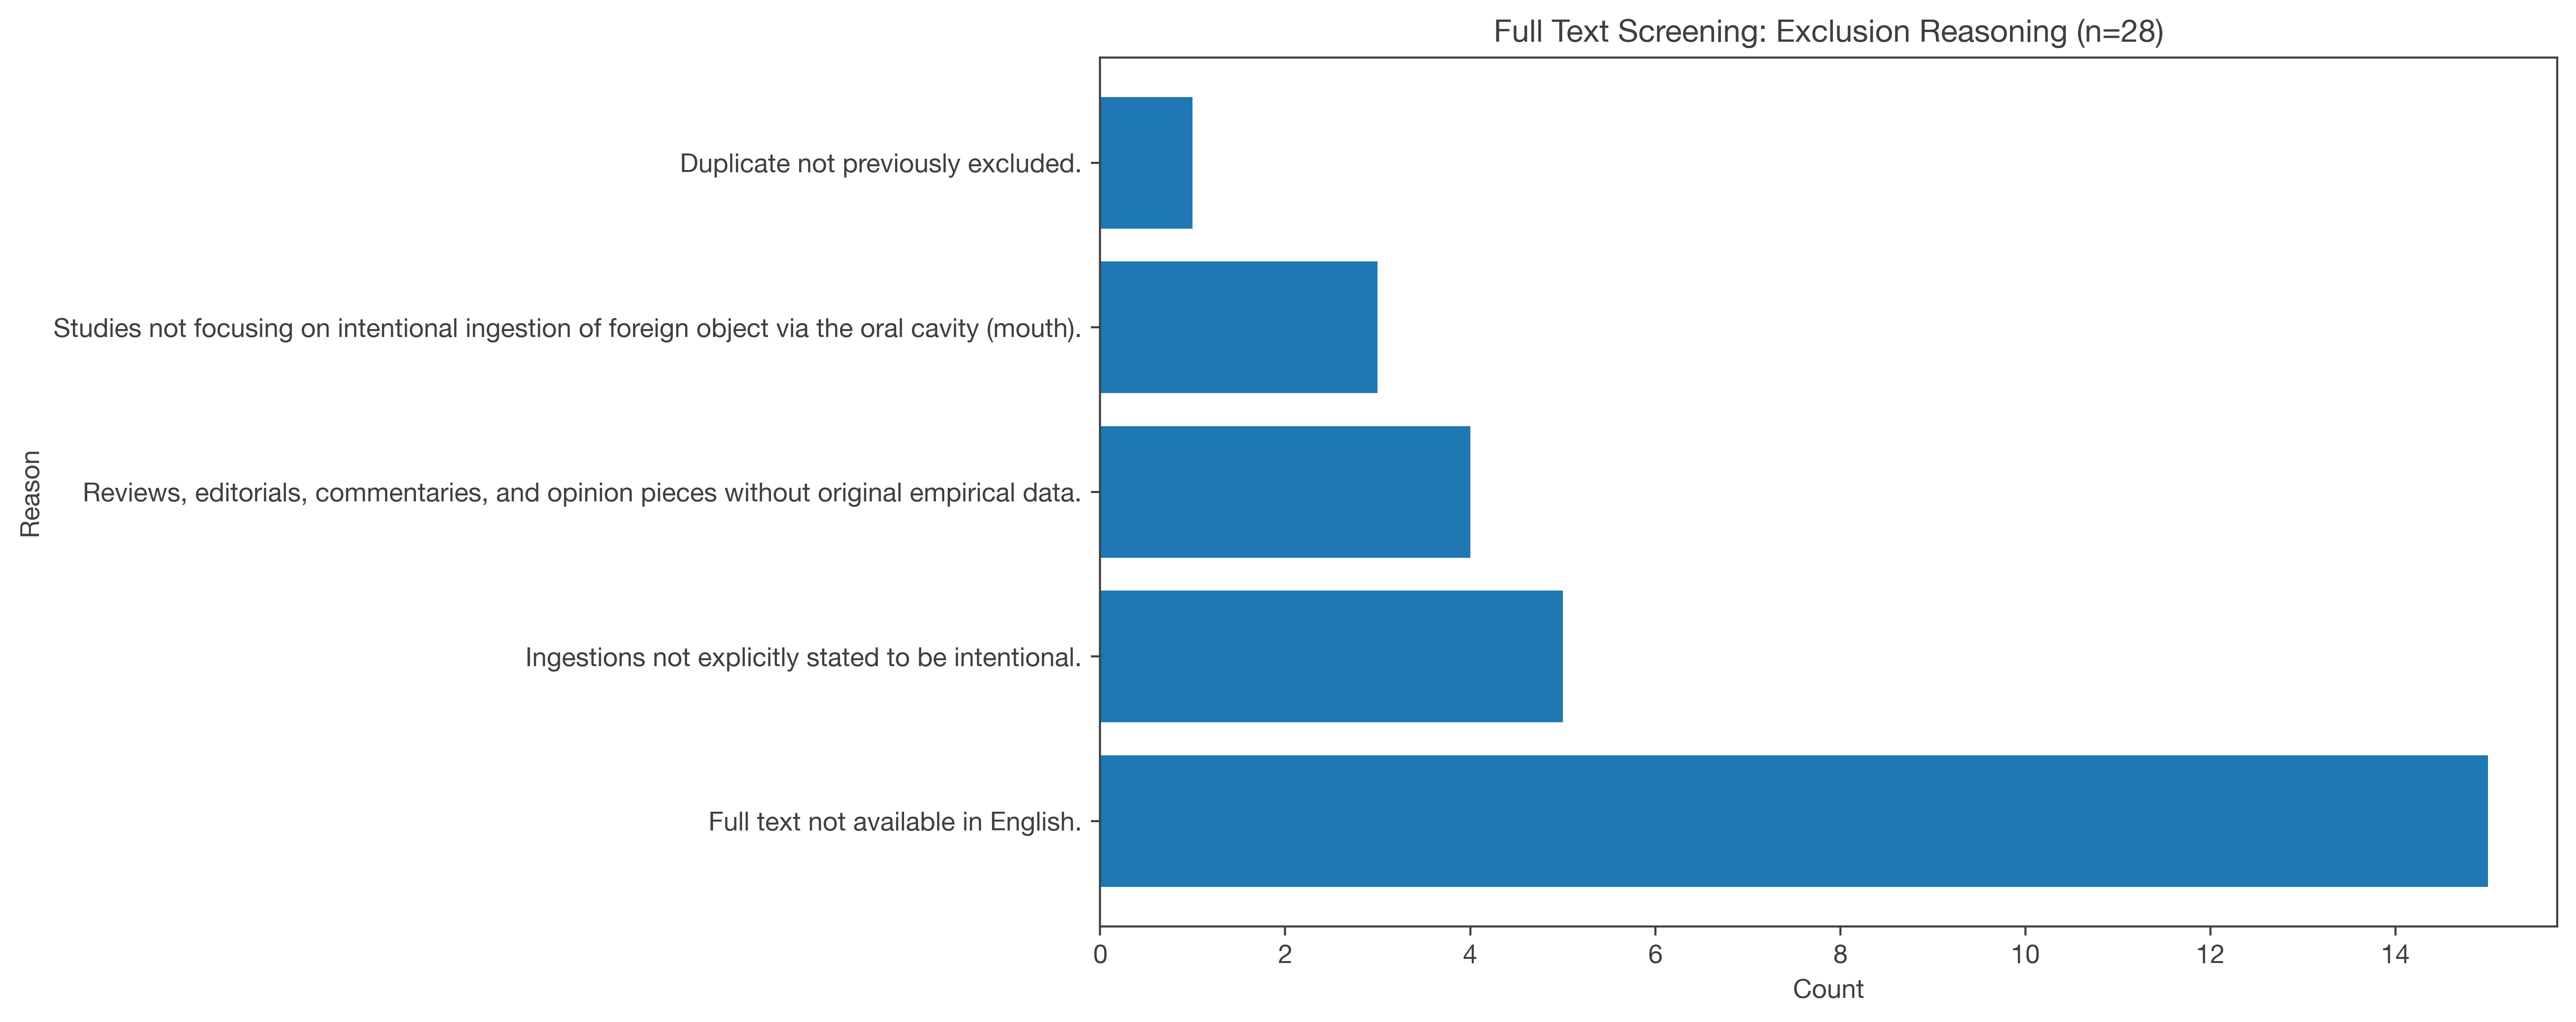

In [ ]:
# Plot horizontal bar chart
plt.barh(y=jge_excluded_reasoning['Reason'],
         width=jge_excluded_reasoning['Count'])

# Plot labels
plt.xlabel("Count") # Y axis
plt.ylabel("Reason") # X axis
plt.title(f"Full Text Screening: Exclusion Reasoning (n={sum(jge_excluded_reasoning['Count'])})") # Title

# Show plot
plt.show()